In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [81]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics



from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import seaborn as sn
%matplotlib inline

In [82]:
kc_df=pd.read_csv("kc_house_data (1).csv")

In [83]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [84]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [85]:
#ID and Date column can be stripped off.


In [86]:
# Recreate the kc_df Data Frame with year_sold value as well as drop the ID column
# kc_df["year_sold"]=kc_df.date.str.slice(0,4)

In [87]:
# Drop the ID and date columns
kc_df.drop(columns=["id","date"],inplace=True)

In [88]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [89]:
# check for missing values
kc_df.isna().sum()
# No missing values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [90]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 10

fig_size[1] = 8

plt.rcParams["figure.figsize"] = fig_size

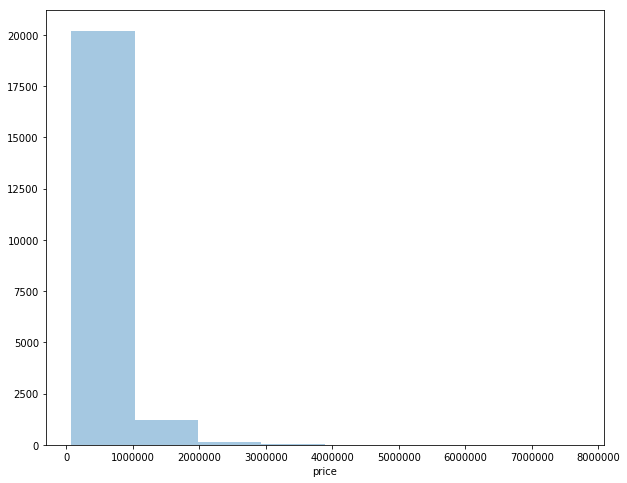

In [91]:
# Check price distribution
sns.distplot(kc_df["price"], kde=False, bins=8)

In [92]:
# You can see that most of the houses are priced between 0 and 1 million

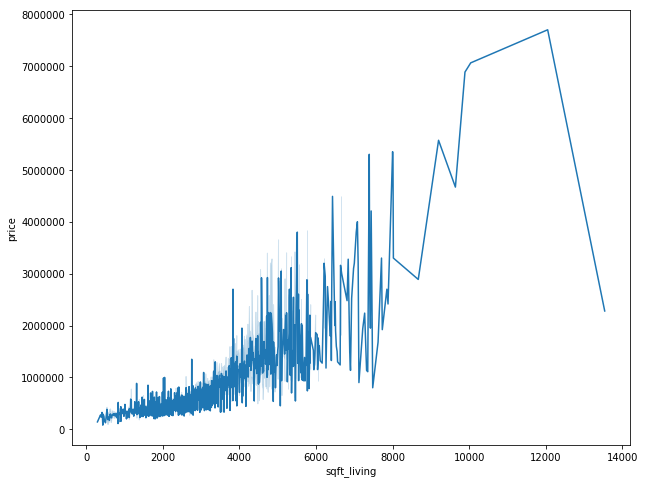

In [93]:
# lets see if there is any relationship between the area of the house in square feet and the price. 
sns.lineplot(x="sqft_living", y="price", data=kc_df)

In [94]:
# Positive correlation between the area of the house and the price. 
# However, if the area is too big, the price starts to decrease. 
# One of the reasons can be the fact that there are very few buyers of the very big houses since huge houses are too expensive to be maintained

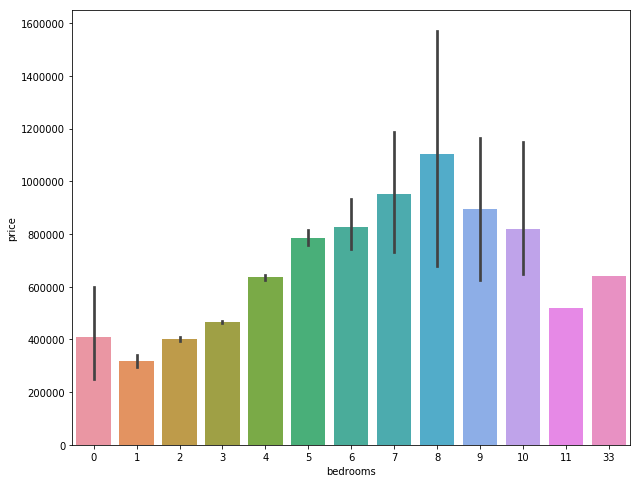

In [95]:
# let’s find the relationship between the number of bedrooms and the price. 
# Since the unique values for the bedroom columns are not too many, we can use a bar plot to draw this relationship. 
sns.barplot(x="bedrooms", y="price", data=kc_df)

In [96]:
# Again the price of the house increased with the increase in the number of bedrooms and decreases in case of too many bedrooms.
# The reason can be the same, the houses with too many bedrooms are big and not so easy to maintain

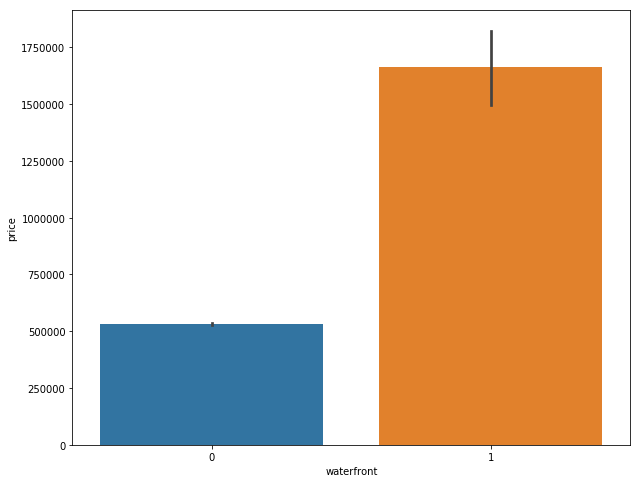

In [97]:
# let’s see if we can find any difference between the prices of the houses with a waterfront and the houses without a waterfront.

sns.barplot(x="waterfront", y="price", data=kc_df)

In [98]:
# It is clearly visible from the output that the houses with waterfront (orange bar) are far more expensive than 
# those without the waterfront (blue bar). 
# This shows that waterfront can really be a useful feature to predict the house price.

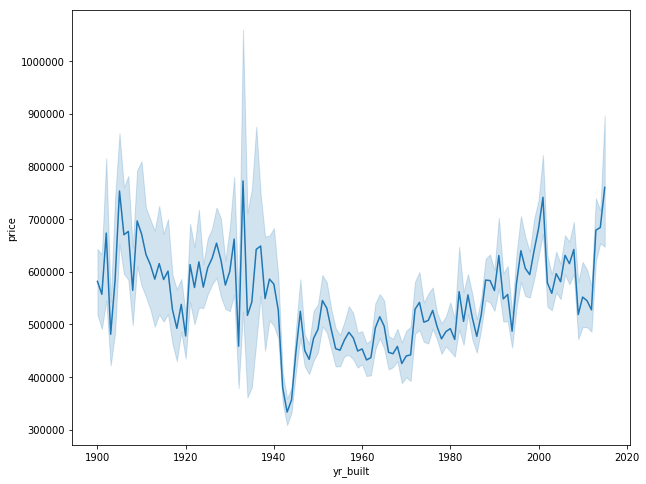

In [99]:
# plot the relationship between the built year and the price of the house. 

sns.lineplot(x="yr_built", y="price", data=kc_df)

In [100]:
# The houses that are too old are expensive may be due to historical value. 
# Similarly, the houses that are relatively newer are expensive too, which is self-explanatory. 
# However the houses that are neither too old nor new have a lower price value 
# since they have neither any historical value associated with them, nor they are new

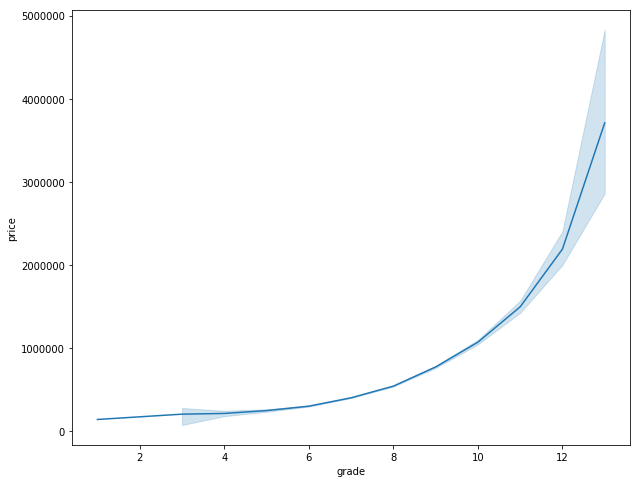

In [101]:
# Relationship between grade and the price of the house
sns.lineplot(x="grade", y="price", data=kc_df)

In [102]:
# The grade and the price of the house have a clear positive correlation as evident from the output

In [103]:
kc_df_col = kc_df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

In [104]:
corr = kc_df_col.corr()


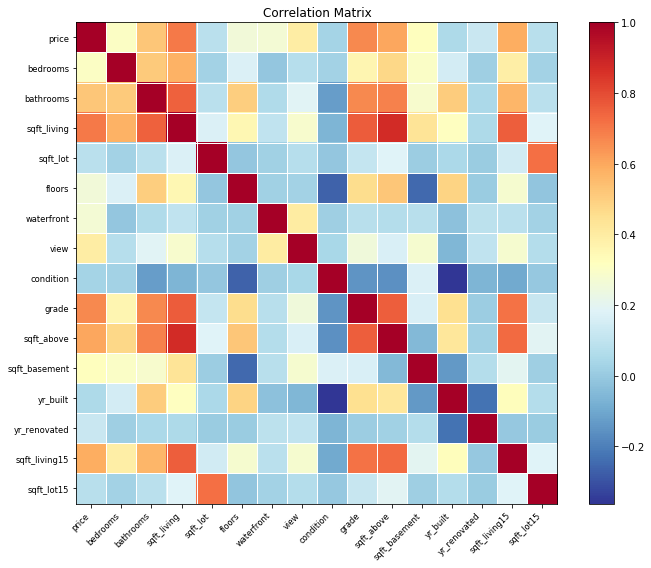

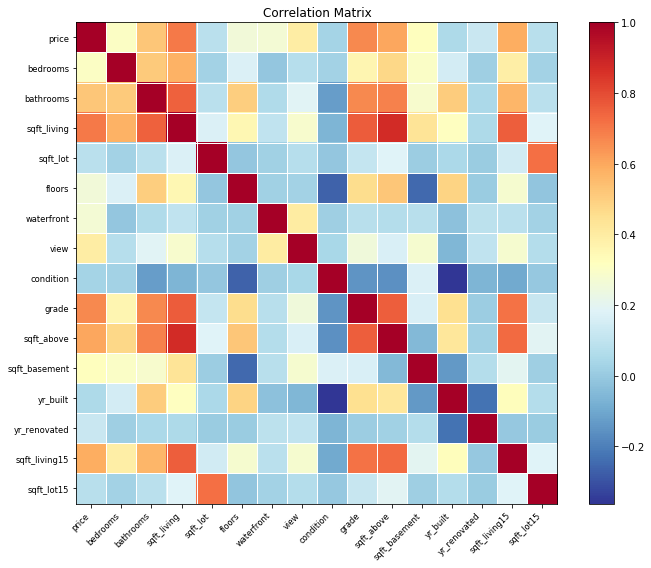

In [105]:
import statsmodels.graphics.api as smg
smg.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
# sqft_living and sqft_above are highly correlated - Only one can be retained
# sqft_living15 and sqft_living are highly correlated - Only one can be retained
# sqft_lot15 and sqft_lot are highly correlated - Only one can be retained

In [32]:
# The following features can be dropped as they don't add anything: sqft_above, sqft_living15, sqft_lot15

In [31]:
# sns.pairplot(kc_df_col,kind='scatter')

In [26]:
kc_df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15'],inplace=True)

In [27]:
# EDA
# No of Bedrooms directly influences the price of the house
# No of bathrooms also influences the price of the house linearly upwards
# Living Room sqft also influences the price of the house linearly upwards 
# Sqft_living and sqft_above are highly correlated
# Sqft_living and grade are highly correlated

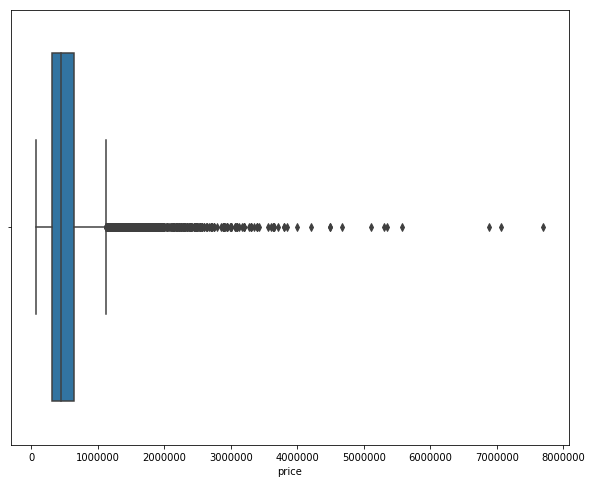

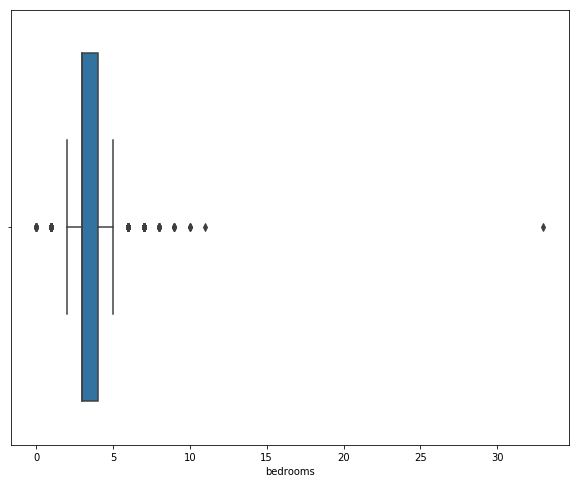

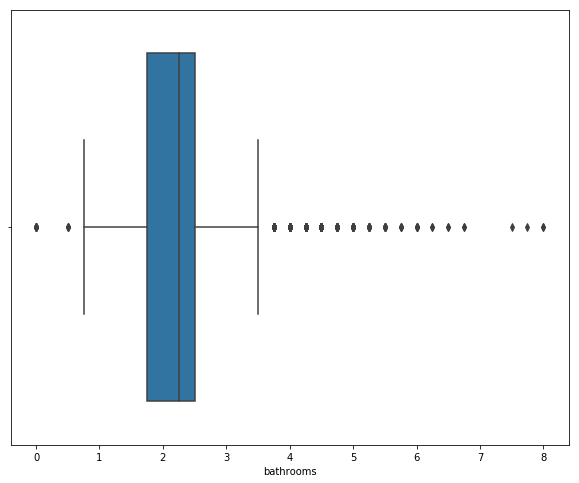

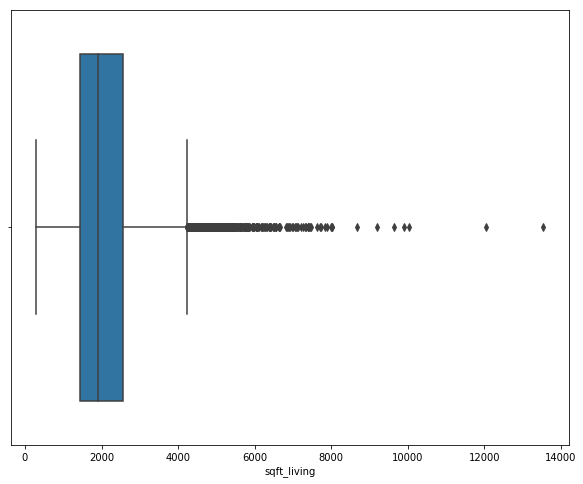

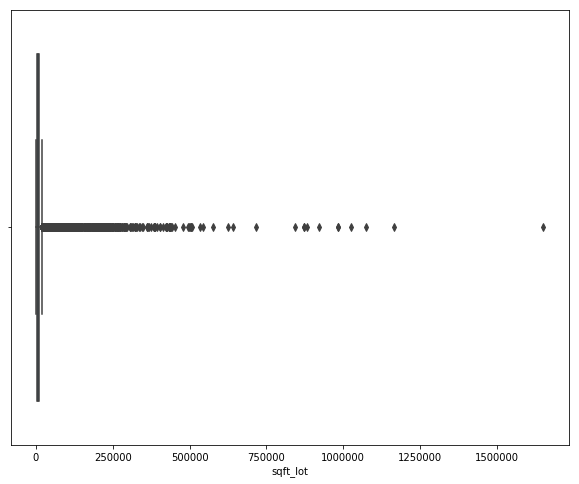

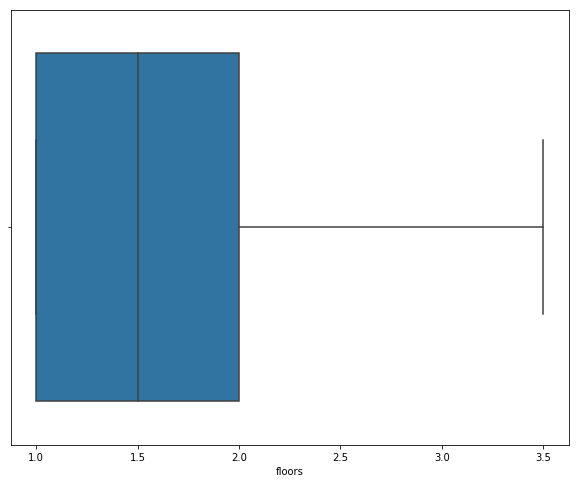

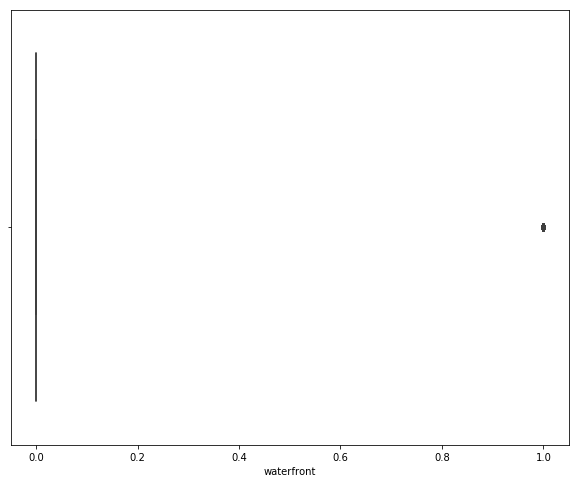

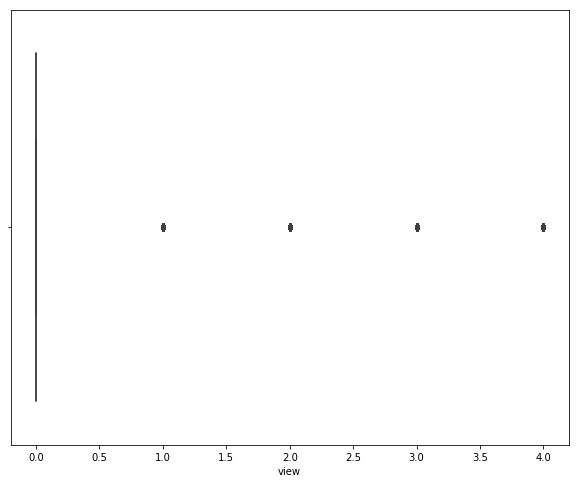

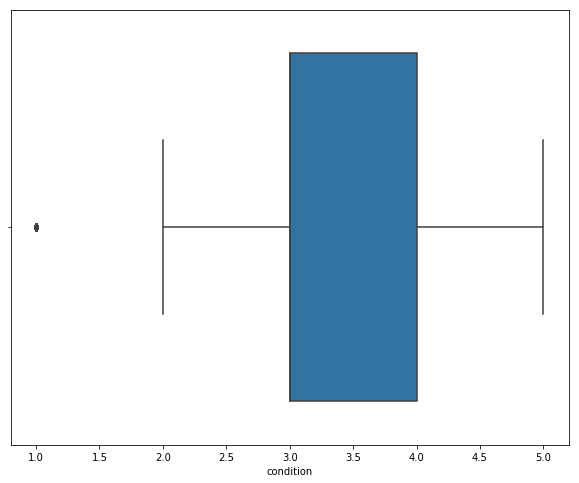

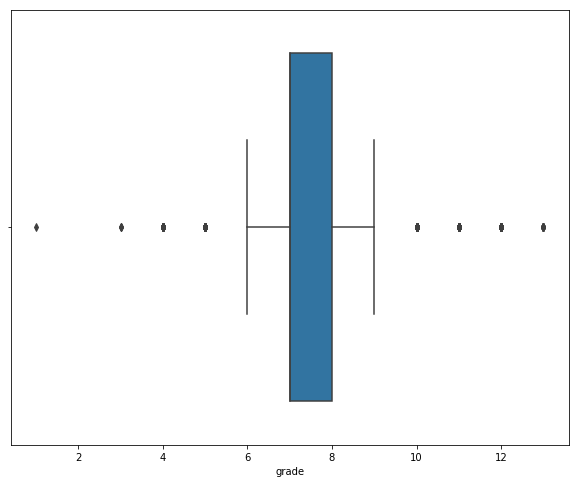

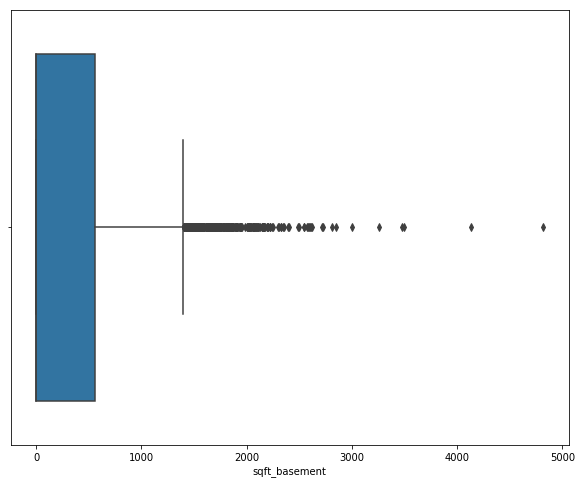

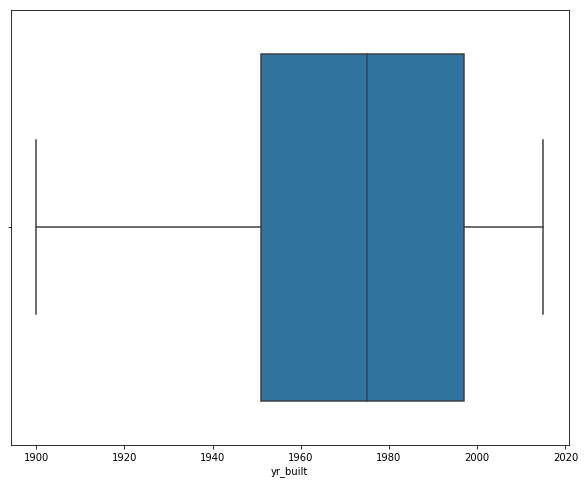

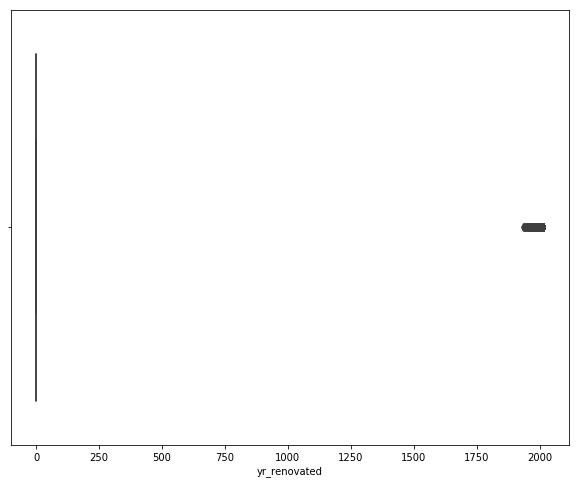

In [43]:
for col in (kc_df.columns):
    sns.boxplot(x=col,data=kc_df,orient="h")
    plt.show()

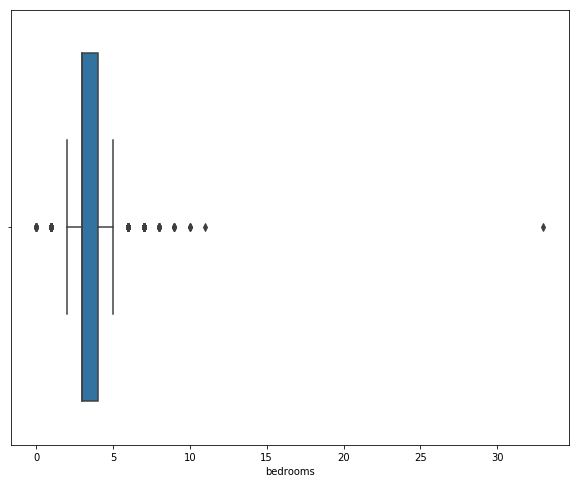

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
8757,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,1420,4960
13314,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,2730,10400
15161,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,2040,11914
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,1330,4700
19254,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,1810,3745


3.37084162309721

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,2360,4000
3119,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,1470,1399
3467,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,1430,1650
4868,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,2170,6000
6994,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,4740,35061
8477,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,2500,8751
8484,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,1810,5685
9773,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,2520,8050
9854,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,1060,7200
12653,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,1500,4675


In [106]:
# It appears there are outliers in the data. Let's look at them in detail

sns.boxplot("bedrooms",data=kc_df_col)
plt.show()
kc_df_col[kc_df_col["bedrooms"]>(9)]
kc_df_col["bedrooms"].mean()
kc_df_col[kc_df_col["bedrooms"]<(1)]

In [107]:
# It appears that the row 15870 is an outlier with bedrooms as 33. Let's replace it with the value 3

kc_df_col["bedrooms"]=np.where(kc_df_col["bedrooms"]==33,3,kc_df_col["bedrooms"])



In [108]:
# It appears that around 13 rows have values for bedroom and bathroom as 0. Let's replace it with the mean of the attribute
kc_df_col["bedrooms"]=np.where(kc_df_col["bedrooms"]==0,3,kc_df_col["bedrooms"])
kc_df_col["bathrooms"]=np.where(kc_df_col["bathrooms"]==0,kc_df_col["bathrooms"].mean(),kc_df_col["bathrooms"])

In [111]:
kc_df_col.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [113]:
kc_df_col.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


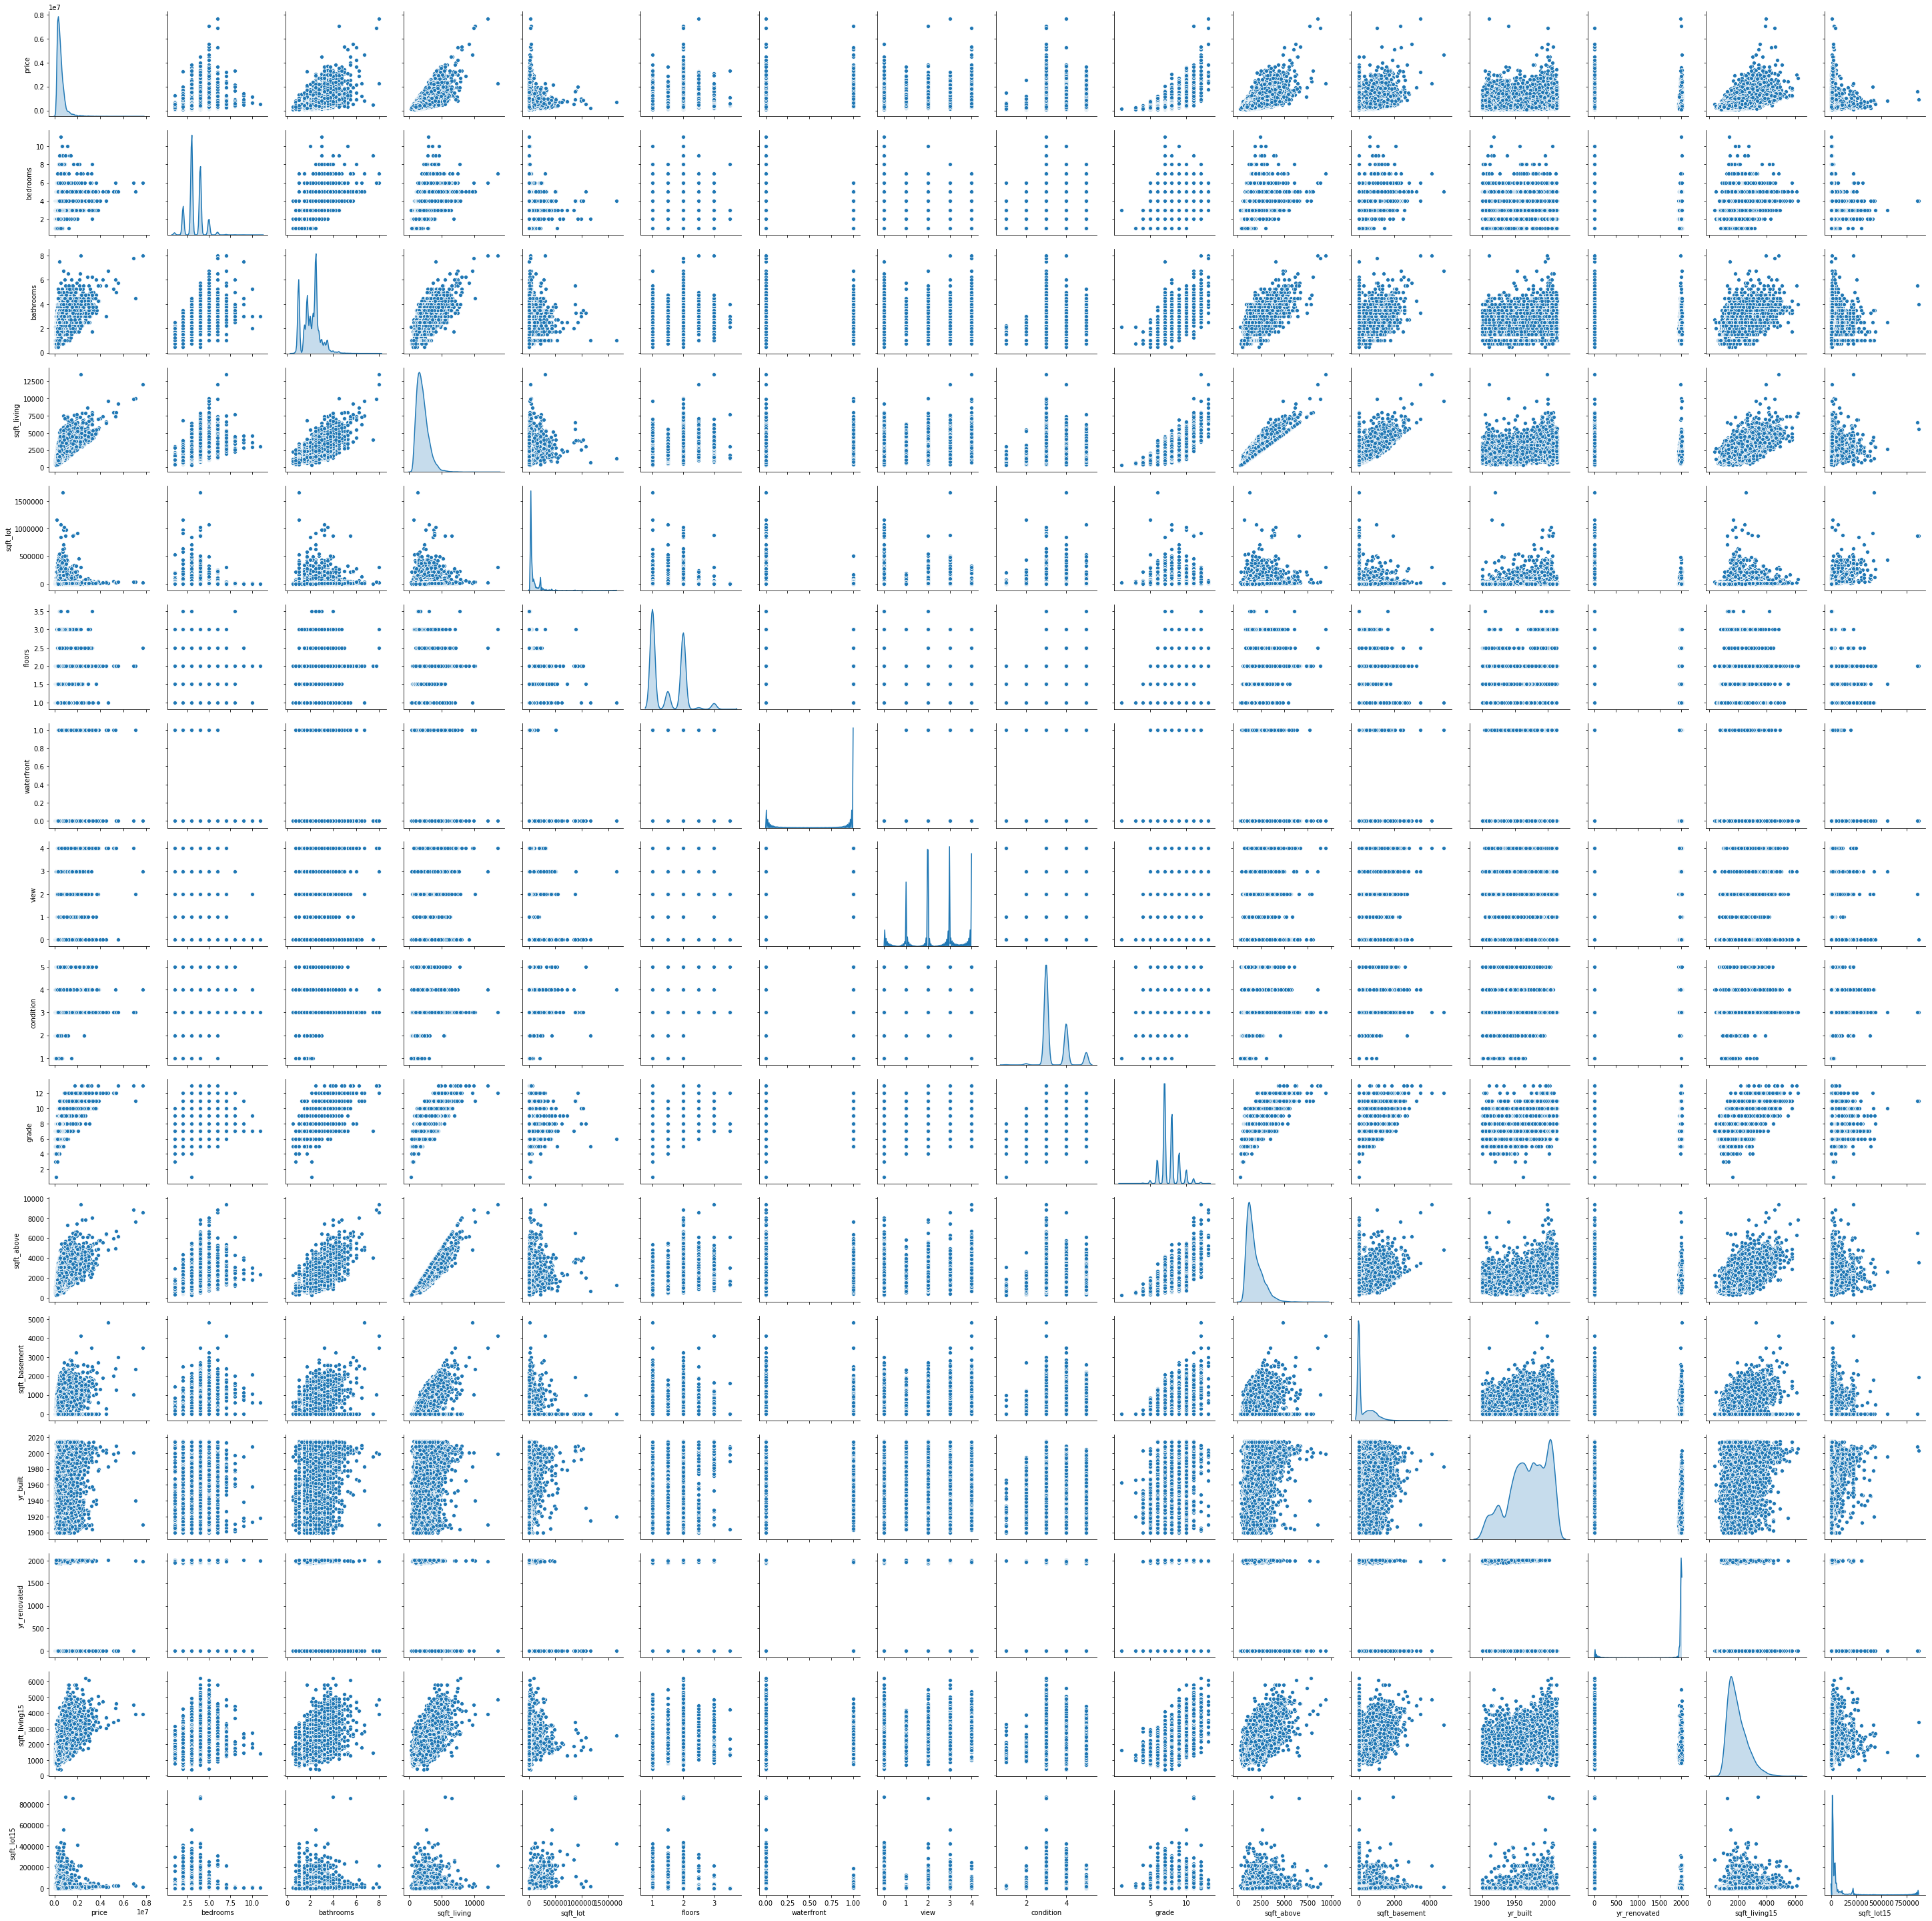

In [114]:
sns.pairplot(kc_df_col,diag_kind='kde')

In [115]:
#kc_df.floors.unique()

In [116]:
scaler = StandardScaler()

In [117]:
X = kc_df_col.drop(columns="price")
y = kc_df_col["price"]

In [157]:
X_train_x, X_test_x, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [158]:
X_train = pd.DataFrame(scaler.fit_transform(X_train_x),columns=X_train_x.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test_x),columns=X_test_x.columns)

In [159]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.408295,-0.153678,-0.595960,-0.207161,-0.920449,-0.087901,-0.303647,-0.629308,-0.565486,-0.300744,-0.664205,0.914405,-0.209648,0.126447,-0.234801
1,-1.517290,-1.465983,-1.404175,-0.186186,-0.920449,-0.087901,-0.303647,2.439444,-1.421781,-1.193915,-0.664205,-0.921398,-0.209648,-1.316091,-0.202146
2,-0.408295,-1.465983,-1.348817,-0.110694,-0.920449,-0.087901,-0.303647,-0.629308,-1.421781,-1.132739,-0.664205,-0.581434,-0.209648,-1.242492,-0.054983
3,0.700699,0.502474,-0.363460,-0.241142,0.927411,-0.087901,-0.303647,-0.629308,-0.565486,-0.043804,-0.664205,1.288365,-0.209648,-0.594822,-0.291013
4,-0.408295,-1.465983,-0.739888,-0.128481,-0.920449,-0.087901,-0.303647,-0.629308,-0.565486,-1.010387,0.357703,-0.615431,-0.209648,0.626920,-0.122091


In [160]:
lreg = LinearRegression()

In [161]:
# Forward Selection

In [162]:
sfs1 = sfs(lreg, k_features=10, forward=True, scoring='r2', cv=5)

In [163]:
sfs1 = sfs1.fit(X_train.values, y_train.values)

In [164]:
sfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.48172529, 0.47655294, 0.45950779, 0.51311425, 0.49573286]),
  'avg_score': 0.48532662632422297,
  'feature_names': ('2',),
  'ci_bound': 0.023256319140791817,
  'std_dev': 0.018094206385133895,
  'std_err': 0.009047103192566948},
 2: {'feature_idx': (2, 8),
  'cv_scores': array([0.53104595, 0.51448291, 0.51477066, 0.55278995, 0.53904305]),
  'avg_score': 0.5304265038655406,
  'feature_names': ('2', '8'),
  'ci_bound': 0.018837785559497812,
  'std_dev': 0.014656437146778988,
  'std_err': 0.007328218573389494},
 3: {'feature_idx': (2, 8, 11),
  'cv_scores': array([0.60519937, 0.5758968 , 0.59881892, 0.61800323, 0.60738264]),
  'avg_score': 0.6010601914157803,
  'feature_names': ('2', '8', '11'),
  'ci_bound': 0.018016022396710026,
  'std_dev': 0.014017077488134558,
  'std_err': 0.007008538744067279},
 4: {'feature_idx': (2, 5, 8, 11),
  'cv_scores': array([0.64148041, 0.61315702, 0.62141414, 0.63446434, 0.6507062 ]),
  'avg_score': 0.6322

In [165]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

Text(0.5,1,'Sequential Forward Selection (w. R^2)')

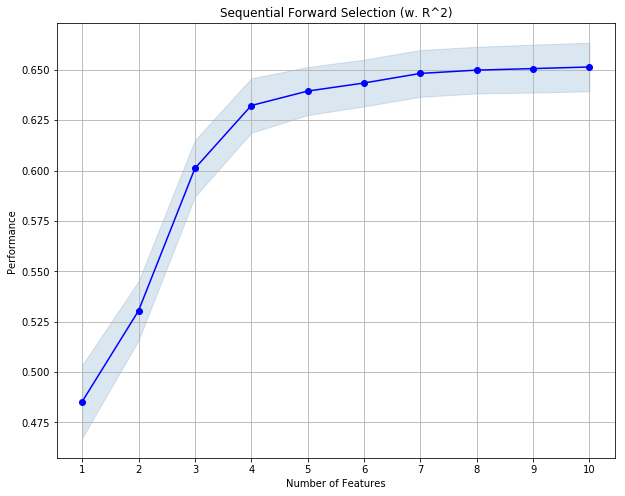

In [166]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [167]:
# Backward Elimination

In [168]:
sfs1 = sfs(lreg, k_features=5, forward=False, scoring='r2', cv=5)
sfs1 = sfs1.fit(X_train.values, y_train.values)


In [169]:
sfs1.get_metric_dict()

{15: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14),
  'cv_scores': array([0.66490446, 0.63646521, 0.64166778, 0.65363291, 0.66214129]),
  'avg_score': 0.6517623297228518,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14'),
  'ci_bound': 0.01431053593281822,
  'std_dev': 0.011134083131672716,
  'std_err': 0.005567041565836358},
 14: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14),
  'cv_scores': array([0.66514719, 0.63611847, 0.6417479 , 0.65442981, 0.66175239]),
  'avg_score': 0.651839151508597,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '13',
   '14'),
  'ci_bound': 0.014439499634883154,
  'std_dev': 0.01123442127320006,
  'std_err': 0.00561721063660003},
 13: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14),
  'cv_scores': array([0.6650511 , 0.63605517, 0.6418656 , 0.6545982

Text(0.5,1,'Sequential Backward Elimination (w. R^2)')

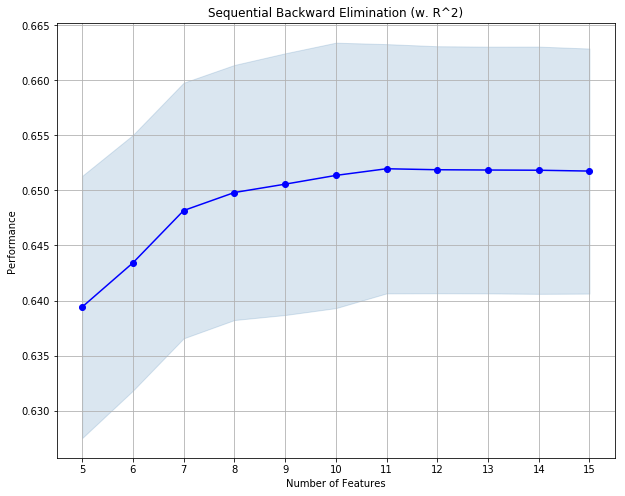

In [170]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Backward Elimination (w. R^2)')
plt.grid()
plt.show()

In [171]:
# Mixed Selection

In [172]:
sfs1 = sfs(lreg, k_features=7, forward=True, scoring='r2', cv=5, floating=True)
sfs1 = sfs1.fit(X_train.values, y_train.values)


In [173]:
sfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.48172529, 0.47655294, 0.45950779, 0.51311425, 0.49573286]),
  'avg_score': 0.48532662632422297,
  'feature_names': ('2',),
  'ci_bound': 0.023256319140791817,
  'std_dev': 0.018094206385133895,
  'std_err': 0.009047103192566948},
 2: {'feature_idx': (2, 8),
  'cv_scores': array([0.53104595, 0.51448291, 0.51477066, 0.55278995, 0.53904305]),
  'avg_score': 0.5304265038655406,
  'feature_names': ('2', '8'),
  'ci_bound': 0.018837785559497812,
  'std_dev': 0.014656437146778988,
  'std_err': 0.007328218573389494},
 3: {'feature_idx': (2, 8, 11),
  'cv_scores': array([0.60519937, 0.5758968 , 0.59881892, 0.61800323, 0.60738264]),
  'avg_score': 0.6010601914157803,
  'feature_names': ('2', '8', '11'),
  'ci_bound': 0.018016022396710026,
  'std_dev': 0.014017077488134558,
  'std_err': 0.007008538744067279},
 4: {'feature_idx': (2, 5, 8, 11),
  'cv_scores': array([0.64148041, 0.61315702, 0.62141414, 0.63446434, 0.6507062 ]),
  'avg_score': 0.6322

Text(0.5,1,'Mixed Selection (w. R^2)')

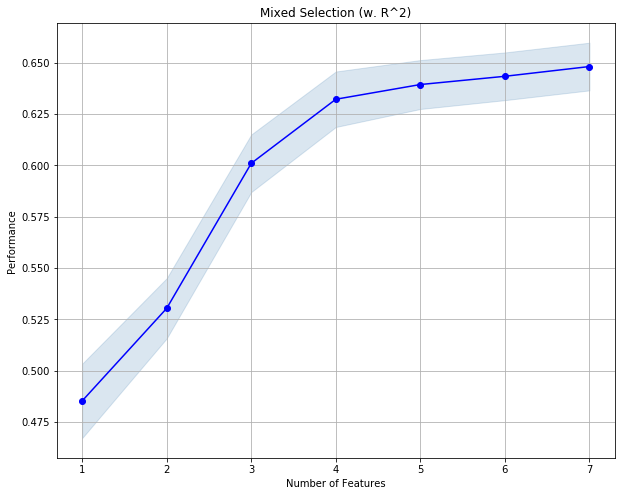

In [174]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Mixed Selection (w. R^2)')
plt.grid()
plt.show()

In [175]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 5, 6, 8, 11]


In [176]:
lreg_subsetColumnList = [columnList[i] for i in feat_cols] 
print(lreg_subsetColumnList)

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built']


## Important features identified - 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built'

In [177]:
model=lreg.fit(X_train[lreg_subsetColumnList],y_train)

In [178]:
model.score(X_train[lreg_subsetColumnList],y_train)

0.6494937446555294

In [179]:
kfold=model_selection.KFold(10)

In [180]:
model_selection.cross_val_score(lreg,X_train[lreg_subsetColumnList],y_train, cv=kfold)

array([0.65442501, 0.66544392, 0.62544593, 0.63653085, 0.63589962,
       0.63933029, 0.67582876, 0.63104266, 0.65899501, 0.6628512 ])

In [181]:
y_pred = lreg.predict(X_test[lreg_subsetColumnList])



In [182]:
print('Mean sAbsolute Error:', metrics.mean_absolute_error( y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean sAbsolute Error: 141148.02963720684
Mean Squared Error: 55014261788.89782
Root Mean Squared Error: 234551.1922563981


In [183]:
model.coef_

array([ -34637.06851993,   41494.65947687,  144813.07353671,
         49490.95981604,   31890.3320951 ,  147210.41540518,
       -106203.32609159])

In [184]:
model.intercept_

537695.3429836738